## dQdV算法在SOH监测中的应用

#### 1. 导入数据，data数据保存在百度网盘feather格式：链接：https://pan.baidu.com/s/1fLqy2kyB0enCuSgNgbffhA 提取码：9527

In [1]:
import feather
import pandas as pd

df = pd.read_feather('0-350数据.feather')

<AxesSubplot:xlabel='系统记录时间'>

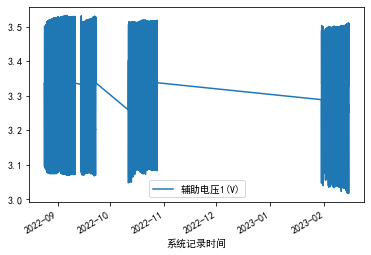

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
df.plot(x='系统记录时间', y =['辅助电压1(V)'])

#### 2. 数据处理，选出充电恒流阶段数据

In [3]:
from dQdV_algorithm import *
df_350_test = df_process(df)

<AxesSubplot:xlabel='系统记录时间'>

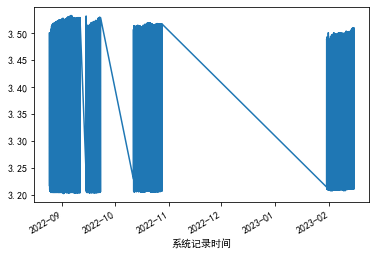

In [4]:
df_350_test['辅助电压1(V)'].plot()

#### 3. 使用dQdV算法获得 df_1 积分数据df 、df_2  最大值数据df 、 df_3  最大值对应电压df

In [5]:
df_1,df_2,df_3 = all_calculate_maxrange(df_350_test) 

<AxesSubplot:>

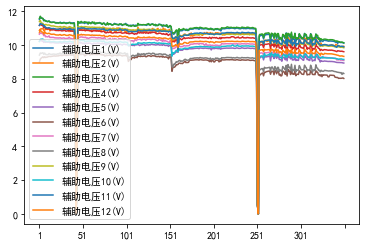

In [6]:
df_1.plot()

<AxesSubplot:>

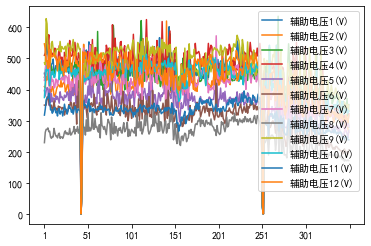

In [7]:
df_2.plot()

<AxesSubplot:>

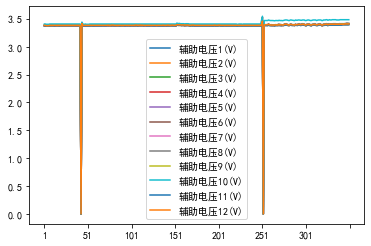

In [8]:
df_3.plot()

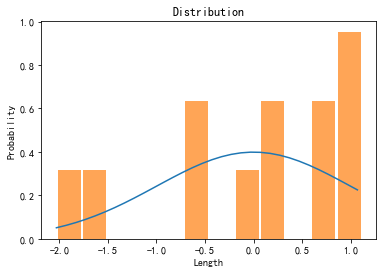

In [9]:
# 归一化函数

def normalization(df):
    df_Z = (df - df.mean()) / df.std()
    return df_Z

df_1_Z = df_1[df_1!=0].dropna()
df_Z = df_1_Z.apply(normalization, axis=1)
df_Z

# 画出正态分布图

Nom = df_Z.iloc[0,:]
mean = Nom.mean()
std = Nom.std()

def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

x = np.arange(Nom.min(), Nom.max(), 0.1)
y = normfun(x, mean, std)

%matplotlib inline
plt.plot(x, y)
plt.hist(Nom, bins=12, rwidth=0.9, density=True, alpha=0.7)
plt.title('Distribution')
plt.xlabel('Length')
plt.ylabel('Probability')
plt.show()

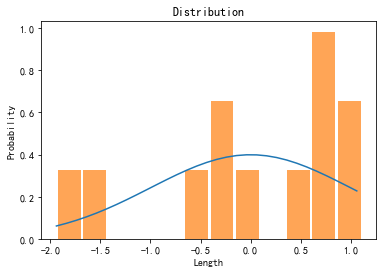

In [10]:
Nom = df_Z.iloc[-1,:]
mean = Nom.mean()
std = Nom.std()

def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

x = np.arange(Nom.min(), Nom.max(), 0.1)
y = normfun(x, mean, std)

%matplotlib inline
plt.plot(x, y)
plt.hist(Nom, bins=12, rwidth=0.9, density=True, alpha=0.7)
plt.title('Distribution')
plt.xlabel('Length')
plt.ylabel('Probability')
plt.show()

#### 4. 增加新的可视化工具

In [18]:
from pyecharts import Bar
from IPython.display import IFrame      # jupyter中显示

In [14]:
x = df_Z.columns
y = df_Z.iloc[0,:]
bar = Bar()
bar.add('0', x, y)
bar.add('350', x, df_Z.iloc[-1,:])
bar.render()

In [15]:
IFrame('render.html', width=800, height=400)

#### 柱状图转成直方图

In [44]:
def pycharts_hist(data):
    bins = np.linspace(-3,3,13)
    value = pd.cut(data,bins)
    value = pd.value_counts(value).sort_index()
    x_value = [ f'{round(i.left,2)}-{round(i.right,2)}' for i in value.index ]
    value= value.tolist()
    
    bar = Bar()
    bar.add('', x_value, value, is_label_show=True)
    # bar.add_yaxis('区间数量',value)
    # bar.set_global_opts(
    #     xaxis_opts=opts.AxisOpts(
    #         name='bin值'
    #     ),
    #     yaxis_opts=opts.AxisOpts(
    #         name = '数量值'
    #     )
    # )
    bar.render()
    IFrame('render.html', width=800, height=400)

In [45]:
pycharts_hist(y)

In [46]:
IFrame('render.html', width=800, height=400)